# Perceptrón para Clasificación Binaria

In [1]:
# 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


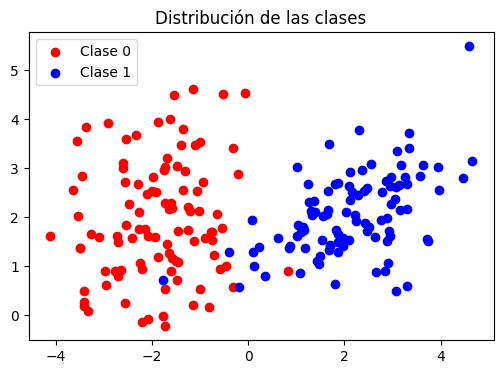

In [2]:
# 2: Cargar y preparar los datos
# Crear un conjunto de datos linealmente separable
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1,
                           class_sep=2.0, random_state=42)

# Visualizar la distribución de las clases
plt.figure(figsize=(6, 4))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.title("Distribución de las clases")
plt.legend()
plt.show()


In [6]:
# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 3: Implementación del perceptrón desde cero
class Perceptron:
    def __init__(self, learning_rate=0.01, n_epochs=100):
        self.lr = learning_rate
        self.n_epochs = n_epochs

    def activation(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1] + 1)
        self.errors = []

        for _ in range(self.n_epochs):
            error_count = 0
            for xi, target in zip(X, y):
                z = np.dot(xi, self.weights[1:]) + self.weights[0]
                y_pred = self.activation(z)
                update = self.lr * (target - y_pred)
                self.weights[1:] += update * xi
                self.weights[0] += update
                error_count += int(update != 0.0)
            self.errors.append(error_count)
        return self

    def predict(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return self.activation(z)


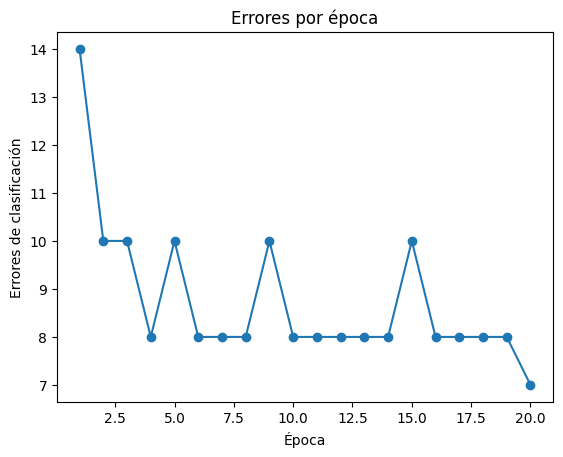

In [8]:
# 4: Entrenamiento y visualización
perceptron = Perceptron(learning_rate=0.01, n_epochs=20)
perceptron.fit(X_train, y_train)

# Visualizar errores por época
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors, marker='o')
plt.xlabel("Época")
plt.ylabel("Errores de clasificación")
plt.title("Errores por época")
plt.show()


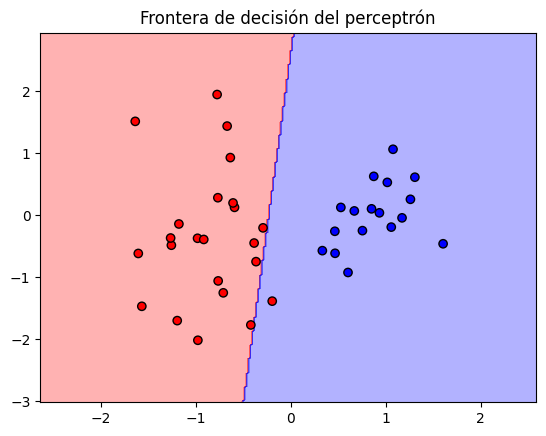

In [9]:
# Visualizar frontera de decisión
def plot_decision_boundary(model, X, y):
    cmap = ListedColormap(['#FF0000', '#0000FF'])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.title("Frontera de decisión del perceptrón")
    plt.show()

plot_decision_boundary(perceptron, X_test, y_test)


## 🧠 Preguntas de Análisis
### 1. ¿Qué representa la función de activación en el perceptrón?
La función de activación convierte la salida lineal del perceptrón (suma ponderada de entradas) en una salida binaria. En este caso, usamos una función escalón que retorna 1 si la salida es mayor o igual a 0, y 0 en caso contrario. Esta decisión define a qué clase pertenece el ejemplo.

### 2. ¿Qué significa que los datos sean linealmente separables?
Significa que existe una línea (en 2D), un plano (en 3D) o un hiperplano (en dimensiones superiores) que puede separar perfectamente los datos de ambas clases sin errores de clasificación.

### 3. ¿Cómo afecta la tasa de aprendizaje al entrenamiento?
La tasa de aprendizaje controla qué tan grandes son los pasos que da el perceptrón al ajustar los pesos. Si es muy alta, puede saltarse la solución óptima; si es muy baja, el entrenamiento puede tardar mucho o estancarse.

### 4. ¿Qué ocurre si aumentamos el número de épocas?
Aumentar las épocas permite que el perceptrón tenga más oportunidades de ajustar los pesos correctamente. Sin embargo, si los datos no son perfectamente separables, más épocas no mejorarán el rendimiento y pueden causar sobreajuste.

